## Add package to python path and import function (s)

In [1]:
import sys
import os

# Manually set the parent directory path
notebook_dir = os.getcwd()  # This gets the current working directory of the notebook
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)

#import an example function from package 
from flim_processing import analyze_single_fitted_channel,generate_small_report_fig

## Upload fitted and intensity image from path 

In [2]:
from pathlib import Path
fit_data_image = Path(r"G:\SP8_FLIM\0_Workflow_OPTIM\5HT\2023-02-07\5HT_0\cl1_VMAT_5HT_0\cl1-1-f.tif")
count_data_image =Path(r"G:\SP8_FLIM\0_Workflow_OPTIM\5HT\2023-02-07\5HT_0\cl1_VMAT_5HT_0\cl1-1.tif")


## Evaluate Mean Lifetimes from Segmented Objects (Granules)
Functionality Overview:
This function analyzes segmented objects (granules) to evaluate mean lifetimes. It generates detailed tables containing results for each individual object and summary report tables for each analyzed image. Filtering options are available to modify the data as required.

In [3]:
result_table,report_table,report_multichannel_image = analyze_single_fitted_channel(count_data_image, fit_data_image)
result_table

,Label,Area,intensity_mean_fluor,mean_chi2,mean_tau,min_fluor,min_chi2,min_tau,STD_fluor,STD_chi2,STD_tau
19,20,360.0,403.288889,105.091667,979.619444,209.0,62.0,428.0,60.955538,13.959463,231.685484
22,23,71.0,302.591549,95.000000,1043.563380,273.0,60.0,585.0,23.161757,12.877538,281.714106
29,30,107.0,397.775701,105.355140,1009.196262,367.0,75.0,499.0,12.278930,13.545529,260.598787
31,32,143.0,379.986014,102.755245,1060.517483,329.0,73.0,584.0,16.771599,11.368720,241.051045
34,35,55.0,305.436364,97.727273,1166.672727,266.0,72.0,682.0,15.346618,11.404074,305.085803
35,36,109.0,325.871560,98.458716,1079.724771,263.0,72.0,529.0,19.773071,11.098006,257.863981
43,44,131.0,357.977099,102.702290,992.908397,260.0,70.0,537.0,28.325390,12.077166,262.839528
46,47,50.0,300.720000,97.340000,1066.400000,114.0,64.0,641.0,52.215339,13.624405,284.554951
50,51,212.0,312.613208,99.165094,1060.834906,232.0,67.0,478.0,33.133398,12.709605,288.161439
60,61,158.0,315.360759,98.632911,1069.443038,222.0,73.0,515.0,21.503081,12.418522,280.016150


##  Generate report images to evaluate analysis 
Use a function from module which generates and saves images displaing the input and result from analisys 

In [5]:
name='random_image_name'
generate_small_report_fig(report_multichannel_image,name)

C:\Users\med\mambaforge\envs\napari-flim-phasor-env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\med\mambaforge\envs\napari-flim-phasor-env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


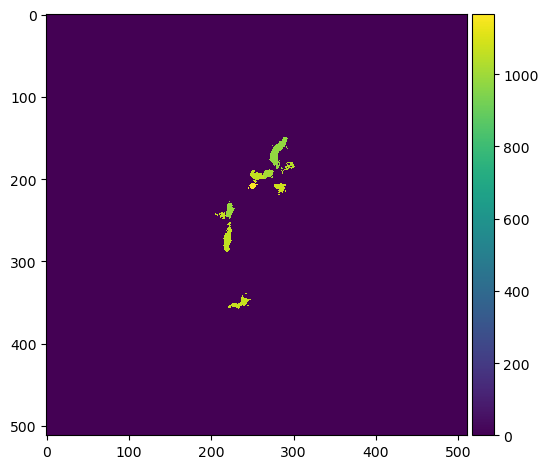

In [6]:
#output images. only 1 chanel from param image (last chanel) 
#depnds where is the chnell stores in multi is 1st or the last axis 
from skimage.io import imsave
from skimage.io import imshow

image_name='param_map_' +count_data_image.stem+'.tif'

# Save the images
#output_image_dir = Path('output_images')
#output_image_dir.mkdir(exist_ok=True)

imshow(report_multichannel_image[...,-1])
#imsave(output_image_dir / image_name, report_multichannel_image[...,-1])